<a href="https://colab.research.google.com/github/hyulianton/JaringanSyarafTiruan/blob/main/jst_CNN_dengan_Dataset_PathMNIST_(MedMNIST_v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔬 Implementasi CNN dengan Dataset PathMNIST (MedMNIST v2)

### **Cell 1: Impor Pustaka dan Instalasi MedMNIST**

Kita perlu menginstal pustaka `medmnist` dan memastikan semua dependensi lain tersedia.

In [1]:
# Import Libraries and Install MedMNIST

# Instal pustaka medmnist (jika belum terinstal di lingkungan Colab)
!pip install medmnist --quiet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import medmnist
from medmnist import INFO, Evaluator
from medmnist.dataset import PathMNIST

print(f"TensorFlow Version: {tf.__version__}")
print(f"MedMNIST Version: {medmnist.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.2 MB/s eta 0:00:00
TensorFlow Version: 2.19.0
MedMNIST Version: 3.0.2


### **Cell 2: Unduh dan Muat Dataset PathMNIST**

Kita akan menggunakan kelas `PathMNIST` untuk mengunduh dan memuat dataset.

In [2]:
# Download and Load the PathMNIST Dataset

data_flag = 'pathmnist'
info = INFO[data_flag]
DataClass = getattr(medmnist.dataset, info['python_class'])

# Muat data training dan testing
# Transformasi ke format tensor NumPy
train_dataset = DataClass(split='train', download=True, as_rgb=True)
test_dataset = DataClass(split='test', download=True, as_rgb=True)

# Ekstraksi citra dan label dari objek dataset
train_images = np.array([x[0] for x in train_dataset])
train_labels = np.array([x[1] for x in train_dataset])
test_images = np.array([x[0] for x in test_dataset])
test_labels = np.array([x[1] for x in test_dataset])

# Normalisasi data
# Nilai piksel berkisar antara 0 hingga 255. Normalisasi ke rentang 0 hingga 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

# Mendefinisikan nama-nama kelas
class_names = info['label']
num_classes = len(class_names)

# Menampilkan informasi dataset
print(f"Shape train_images: {train_images.shape}")
print(f"Shape test_images: {test_images.shape}")
print(f"Jumlah kelas: {num_classes}")

100%|██████████| 206M/206M [04:55<00:00, 696kB/s]


Shape train_images: (89996, 28, 28, 3)
Shape test_images: (7180, 28, 28, 3)
Jumlah kelas: 9


### **Cell 3: Eksplorasi Data (PathMNIST)**

Visualisasi beberapa contoh citra histopatologi. Perhatikan bahwa resolusi citra adalah **28x28x3** (berwarna).

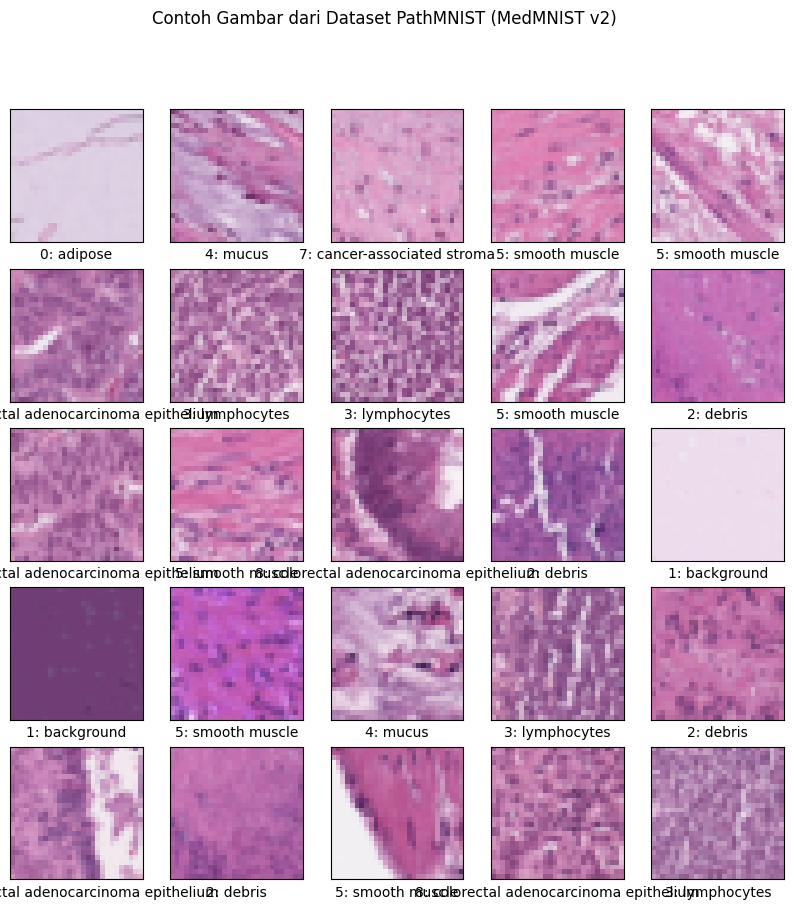

In [5]:
# Cell 3: Eksplorasi Data (PathMNIST) - Versi Perbaikan Definitif

# Data Exploration: Plot some examples from PathMNIST

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Menampilkan gambar
    plt.imshow(train_images[i])

    # 1. Ambil nilai integer label (misalnya, 0, 1, 2,...)
    label_value = int(train_labels[i][0])

    # 2. Konversi nilai label ke string untuk akses kamus (Solusi Paling Robust)
    # Beberapa versi MedMNIST menyimpan kunci sebagai string ('0', '1', ...)
    label_key = str(label_value)

    # 3. Coba akses menggunakan string. Jika gagal, coba gunakan integer.
    try:
        class_name = class_names[label_key]
    except KeyError:
        # Jika kunci string ('0') gagal, coba kunci integer (0)
        class_name = class_names[label_value]

    # Menampilkan label kelas
    plt.xlabel(f"{label_value}: {class_name}")

plt.suptitle("Contoh Gambar dari Dataset PathMNIST (MedMNIST v2)")
plt.show()

### **Cell 4: Membangun Model CNN yang Diadaptasi**

Arsitektur model disesuaikan untuk input **28x28x3** dan jumlah kelas output **9**. Saya juga menambahkan lapisan `Dropout` sebagai salah satu saran perbaikan kinerja.

In [6]:
# Build the Adapted CNN Model

model = models.Sequential()

# Blok 1: Convolutional dan Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
# Tambahkan Dropout untuk mengurangi Overfitting
model.add(layers.Dropout(0.25))

# Blok 2: Convolutional dan Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Blok 3: Convolutional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Bagian Dense (Fully Connected)
model.add(layers.Flatten())
# Lapisan Dense tersembunyi
model.add(layers.Dense(128, activation='relu')) # Sedikit meningkatkan neuron
model.add(layers.Dropout(0.5)) # Dropout yang lebih agresif di Fully Connected Layer
# Lapisan output (jumlah neuron = jumlah kelas, yaitu 9 untuk PathMNIST)
model.add(layers.Dense(num_classes, activation='softmax'))

# Menampilkan ringkasan arsitektur model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,337 (513.04 KB)

 Trainable params: 131,337 (513.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Cell 5: Kompilasi dan Latih Model**

Proses pelatihan model menggunakan 10 *epoch*.

In [7]:
# Compile and Train the Model

# Kompilasi model
model.compile(optimizer='adam',
              # Loss Sparse Categorical Crossentropy digunakan karena label berupa integer (0-8)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Melatih model (digunakan 10 epoch sebagai contoh)
print("Memulai proses pelatihan...")
history = model.fit(train_images, train_labels, epochs=10,
                    # Tambahkan validation_split untuk monitoring overfitting
                    validation_split=0.1,
                    batch_size=64)
print("Pelatihan selesai.")

Memulai proses pelatihan...
Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4126 - loss: 1.5458 - val_accuracy: 0.6766 - val_loss: 0.9057
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6556 - loss: 0.9454 - val_accuracy: 0.6373 - val_loss: 1.0191
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7108 - loss: 0.8034 - val_accuracy: 0.7463 - val_loss: 0.6702
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7397 - loss: 0.7260 - val_accuracy: 0.7097 - val_loss: 0.7889
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7567 - loss: 0.6824 - val_accuracy: 0.7769 - val_loss: 0.6198
Epoch 6/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7773 - loss: 0.6255 - val_accuracy: 0.7000 - val_loss: 0.8664
Epoch 7/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7854 - loss: 0.6033 - val_accuracy: 0.8052 - val_loss: 0.5372
Epoch 8/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accur

### **Cell 6: Evaluasi Kinerja Model**

Evaluasi akhir dan visualisasi riwayat pelatihan.

225/225 - 2s - 10ms/step - accuracy: 0.7436 - loss: 1.1110

Akurasi pada Test Set: 74.36%
Loss pada Test Set: 1.1110


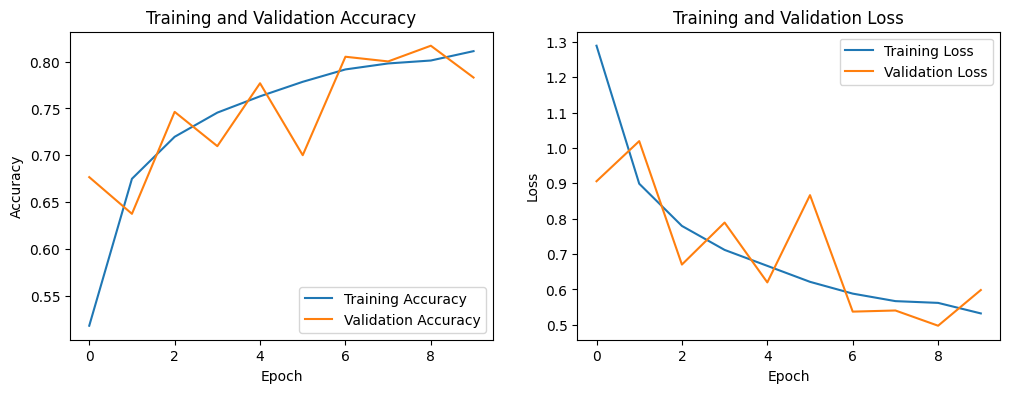

In [8]:
# Evaluate Model Performance

# 1. Evaluasi pada Test Data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nAkurasi pada Test Set: {test_acc*100:.2f}%")
print(f"Loss pada Test Set: {test_loss:.4f}")

# 2. Visualisasi Riwayat Pelatihan (Accuracy dan Loss)
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 🖼️ Contoh Implementasi Data Augmentation untuk PathMNIST

Teknik augmentasi umum untuk citra histopatologi meliputi rotasi, pembalikan (flipping), dan penggeseran (shifting).

### **Cell 7: Menambahkan Lapisan Data Augmentation**

Cell ini mendefinisikan lapisan augmentasi yang akan diaplikasikan secara acak ke gambar *training* sebelum masuk ke model.

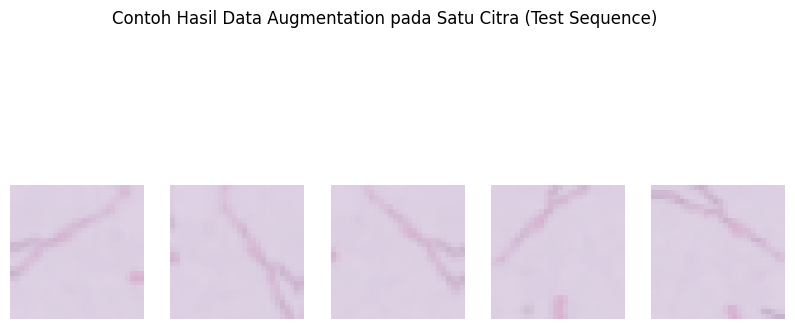

In [14]:
# Cell 7: Mendefinisikan Lapisan Data Augmentation Secara Terpisah (Perbaikan)

# Definisikan lapisan-lapisan Data Augmentation sebagai objek terpisah
random_flip = layers.RandomFlip("horizontal")
random_rotation = layers.RandomRotation(0.2)
random_translation = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
random_contrast = layers.RandomContrast(factor=0.1)

# Uji visual augmentasi pada satu contoh gambar (opsional)
# Perhatian: Karena sekarang mereka adalah lapisan individual, pengujian visualnya tidak semudah sebelumnya
# Anda harus mengaplikasikannya satu per satu atau tetap menggunakan tf.keras.Sequential untuk pengujian:
test_augmentation = tf.keras.Sequential([
    random_flip,
    random_rotation,
    random_translation,
    random_contrast
])

plt.figure(figsize=(10, 5))
for i in range(5):
    # Gunakan Sequential sementara untuk pengujian visual
    augmented_image = test_augmentation(train_images[0])
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_image.numpy())
    plt.axis('off')
plt.suptitle("Contoh Hasil Data Augmentation pada Satu Citra (Test Sequence)")
plt.show()

### **Cell 8: Membangun Ulang dan Melatih Model dengan Augmentation**

Model yang telah dimodifikasi (dari Cell 4) akan ditambahkan lapisan `data_augmentation` ini sebagai lapisan pertama.

In [15]:
# Cell 8: Membangun Ulang dan Melatih Model menggunakan Functional API (Perbaikan Akhir)

# Definisikan input_shape PathMNIST
input_shape = train_images.shape[1:] # (28, 28, 3)
num_classes = len(class_names) # 9

# 1. Definisikan Lapisan Input
inputs = tf.keras.Input(shape=input_shape)

# 2. Terapkan Augmentation ke input satu per satu (Menghindari Sequential Bug)
x = random_flip(inputs)
x = random_rotation(x)
x = random_translation(x)
x = random_contrast(x)

# 3. Bangun Arsitektur CNN di atas input yang sudah diaugmentasi
# Blok 1
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Blok 2
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Blok 3
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Bagian Dense (Fully Connected)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Lapisan Output
outputs = layers.Dense(num_classes, activation='softmax')(x)

# 4. Buat Model
model_augmented = tf.keras.Model(inputs=inputs, outputs=outputs)

# Menampilkan ringkasan arsitektur model
model_augmented.summary()

# 5. Kompilasi Model
model_augmented.compile(optimizer='adam',
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                        metrics=['accuracy'])

# 6. Latih Model
print("Memulai proses pelatihan dengan Data Augmentation (Functional API)...")
history_augmented = model_augmented.fit(train_images, train_labels, epochs=15,
                                        validation_split=0.1,
                                        batch_size=64)
print("Pelatihan selesai.")

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 28, 28, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 28, 28, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 28, 28, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,337 (513.04 KB)

 Trainable params: 131,337 (513.04 KB)

 Non-trainable params: 0 (0.00 B)

Memulai proses pelatihan dengan Data Augmentation (Functional API)...
Epoch 1/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3332 - loss: 1.7113 - val_accuracy: 0.6269 - val_loss: 1.0093
Epoch 2/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6071 - loss: 1.0544 - val_accuracy: 0.6589 - val_loss: 0.9016
Epoch 3/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6655 - loss: 0.9096 - val_accuracy: 0.5409 - val_loss: 1.3683
Epoch 4/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6935 - loss: 0.8482 - val_accuracy: 0.6480 - val_loss: 0.9566
Epoch 5/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7113 - loss: 0.8013 - val_accuracy: 0.6738 - val_loss: 0.8836
Epoch 6/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7285 - loss: 0.7508 - val_accuracy: 0.6848 - val_loss: 0.8457
Epoch 7/15
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7317 - loss: 0.7406 - val_accuracy: 0.6547 - val_loss: 0.8930
Epoch 8/15
12

### **Cell 9: Evaluasi Kinerja Model yang Diaugmentasi**

Cell ini mengevaluasi kinerja model baru.

225/225 - 1s - 4ms/step - accuracy: 0.7553 - loss: 0.7434

Akurasi pada Test Set (dengan Augmentation): 75.53%
Loss pada Test Set (dengan Augmentation): 0.7434


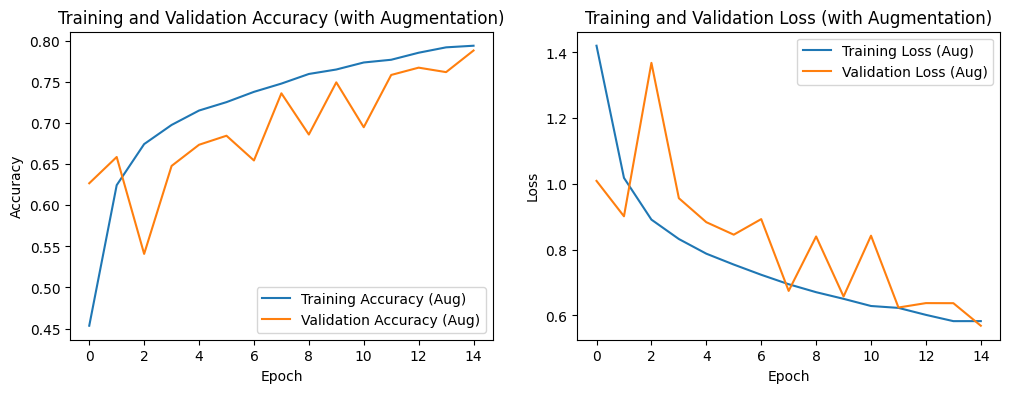

In [16]:
# Cell 9: Evaluasi Kinerja Model yang Diaugmentasi

# 1. Evaluasi pada Test Data
test_loss_aug, test_acc_aug = model_augmented.evaluate(test_images,  test_labels, verbose=2)
print(f"\nAkurasi pada Test Set (dengan Augmentation): {test_acc_aug*100:.2f}%")
print(f"Loss pada Test Set (dengan Augmentation): {test_loss_aug:.4f}")

# 2. Visualisasi Riwayat Pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (Aug)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (Aug)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (with Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss (Aug)')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss (Aug)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (with Augmentation)')

plt.show()

Dengan penambahan Data Augmentation, diharapkan kinerja model pada data validasi dan data uji akan lebih stabil dan memiliki akurasi yang lebih tinggi dibandingkan tanpa augmentasi, yang merupakan teknik dasar dalam penelitian **Machine Learning** pada citra.